## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_ids = merged_data["Mouse ID"].unique()
len(mice_ids)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_rows_df = merged_data[merged_data.duplicated()]
print(duplicated_rows_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = merged_data[merged_data["Mouse ID"] == "g989"]
g989_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data["Mouse ID"] != "g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_data = cleaned_data.groupby(["Drug Regimen"])
# mean, median, variance, standard deviation, and SEM of the tumor volume.
grouped_mean = grouped_data["Tumor Volume (mm3)"].mean()
grouped_median = grouped_data["Tumor Volume (mm3)"].median()
grouped_var = grouped_data["Tumor Volume (mm3)"].var()
grouped_std = grouped_data["Tumor Volume (mm3)"].std()
grouped_sem = grouped_data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
grouped_stats = pd.DataFrame({"Mean": grouped_mean, "Median": grouped_median, "Variance": grouped_var, "Standard Deviation": grouped_std, "SEM": grouped_sem})
grouped_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
aggregation_stats = grouped_data.agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
aggregation_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Tumor Medicine Tested on Mice')

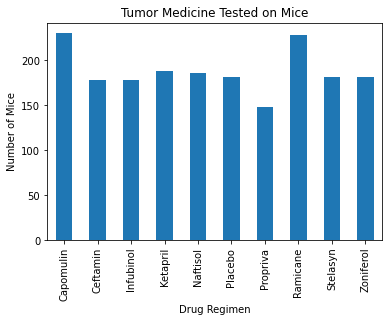

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
data_points = cleaned_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
data_points.plot(kind = "bar")
plt.ylabel("Number of Mice")
plt.title("Tumor Medicine Tested on Mice")

Text(0, 0.5, 'Number of Mice')

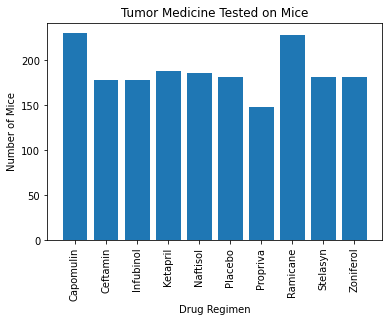

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(data_points))
plt.bar(x_axis, data_points, align = "center")
ticks = [value for value in x_axis]
plt.xticks(ticks, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.title("Tumor Medicine Tested on Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

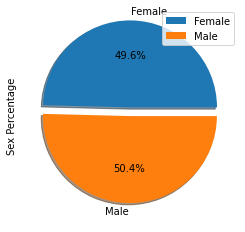

In [11]:
# Create a sex based grouping based on unique mice
sex_group = cleaned_data.groupby(["Mouse ID", "Sex"])
sex_df = pd.DataFrame(sex_group.size())
#Find the total numbers of Male and Female mice
mouse_sex = pd.DataFrame(sex_df.groupby(["Sex"]).count())
mouse_sex.columns = ["Sex Percentage"]
mouse_sex
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex.plot.pie(y="Sex Percentage", explode = (.1,0), shadow = True, autopct="%1.1f%%")

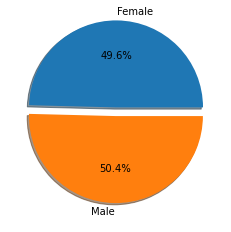

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_pyplot = plt.pie([(123/248), (125/248)], explode = (.1,0), labels = ["Female", "Male"], autopct = "%1.1f%%", shadow = True)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
specific_regimens = cleaned_data[cleaned_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
#Sort the dataframe to show last Timepoint for each mouse then only keep the last timepoint for each mouse
specific_regimens = specific_regimens.sort_values(["Timepoint"], ascending = False)
specific_regimens = specific_regimens.drop_duplicates(subset = ["Mouse ID"])
specific_regimens
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#Above step not needed with my process I think?

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
1205,m756,Infubinol,Male,19,30,5,47.010364,1
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_names = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes_by_regimen =  specific_regimens.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tumor_volumes_by_regimen
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Drug Regimen
Capomulin    [47.68596303, 33.32909778, 32.37735684, 31.896...
Ceftamin     [62.99935619, 59.74190064, 61.84902336, 68.923...
Infubinol    [62.75445141, 62.43540402, 67.97341878, 65.525...
Ramicane     [33.39765251, 31.09533505, 31.56046955, 30.638...
Name: Tumor Volume (mm3), dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6c4040a20>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6c4052160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6c4040710>,
 'medians': [<matplotlib.lines.Line2D at 0x1d6c4052860>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d6c4052be0>,
 'means': []}

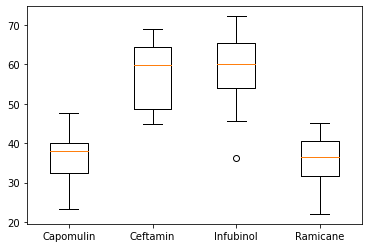

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volumes_by_regimen, labels = drug_names)

## Line and Scatter Plots

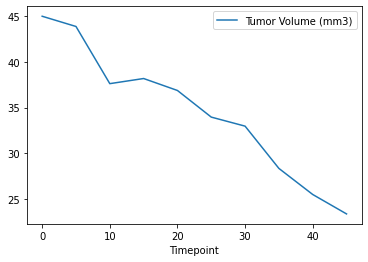

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
vol_vs_time = cleaned_data[cleaned_data["Mouse ID"].isin(["s185"])]
lines = vol_vs_time.plot.line(x="Timepoint", y = "Tumor Volume (mm3)")


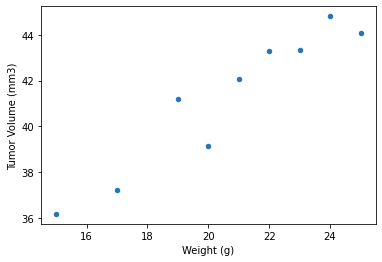

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_weight = cleaned_data[cleaned_data["Drug Regimen"].isin(["Capomulin"])]
capomulin_grouped = capomulin_weight.groupby("Weight (g)")["Tumor Volume (mm3)"].mean().reset_index()
scatter = capomulin_grouped.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)")

## Correlation and Regression

The r-squared is: 0.9034966277438609


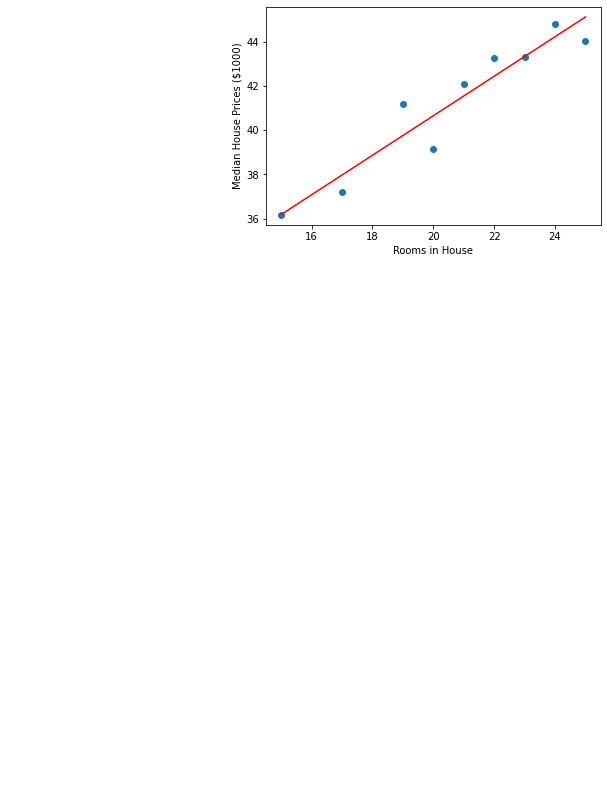

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_grouped["Weight (g)"]
y_values = capomulin_grouped["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
